# Aim: Assess word frequency changes over time

# Setup

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics.pairwise

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
import umap

import dataimport
import processing
import importlib
dataimport = importlib.reload(dataimport)
processing = importlib.reload(processing)

In [6]:
df = dataimport.read_data()
words, word_frequencies = processing.bag_of_words(df)

# Find candidates

In [7]:
# We extract word frequency sum, avg, and stddev; and calculate C.V.
word_stats = pd.DataFrame([words, word_frequencies.sum(axis=0), word_frequencies.mean(axis=0), word_frequencies.std(axis=0)]).T
word_stats.columns = ["word", "sum-freq", "mean-freq", "std-freq"]
word_stats["cv-freq"] = word_stats["std-freq"] / word_stats["mean-freq"]

# We only retain words which have been mentioned at least 50 times and sort by C.V.
word_stats = word_stats.loc[word_stats["sum-freq"] > 50, :]
word_stats = word_stats.sort_values(by="cv-freq", ascending=False)

# Print some potentially interesting words
word_stats.head(50)

,word,sum-freq,mean-freq,std-freq,cv-freq
15384,trag,69,0.0716511,0.527594,7.36337
7720,handlung,52,0.0539979,0.385608,7.14117
6254,frankfurt,51,0.0529595,0.373442,7.05147
1863,bed,55,0.0571132,0.391841,6.86079
3209,charakter,65,0.0674974,0.423373,6.27243
10503,meister,62,0.0643821,0.384011,5.96456
5902,faust,55,0.0571132,0.331551,5.80516
12303,poesie,62,0.0643821,0.370244,5.75072
9898,leser,73,0.0758048,0.421965,5.56647
6685,gegenst,70,0.0726895,0.403659,5.55319


# Plot frequencies

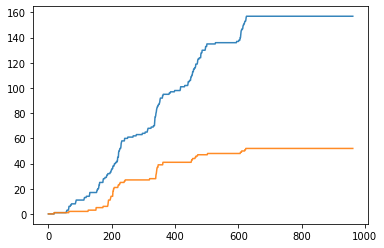

In [8]:
print_words = ["almanach", "almanachs"]
for print_word in print_words:
    freq_over_time = word_frequencies[:, np.array(words)==print_word]
    plt.plot(np.cumsum(freq_over_time), alpha=0.9)

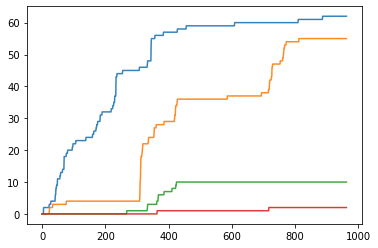

In [9]:
print_words = ["meister", "faust", "dorothea", "tasso"]
for print_word in print_words:
    freq_over_time = word_frequencies[:, np.array(words)==print_word]
    plt.plot(np.cumsum(freq_over_time), alpha=0.9)

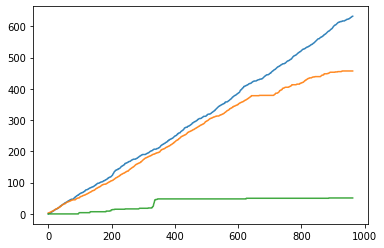

In [10]:
print_words = ["weimar", "jena", "frankfurt"]
for print_word in print_words:
    freq_over_time = word_frequencies[:, np.array(words)==print_word]
    plt.plot(np.cumsum(freq_over_time), alpha=0.9)

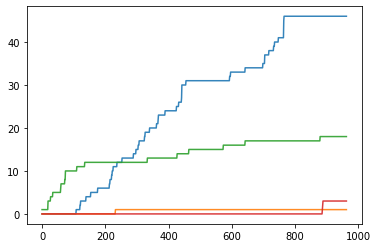

In [11]:
print_words = ["schlegel", "klopstock", "fichte", "hegel"]
for print_word in print_words:
    freq_over_time = word_frequencies[:, np.array(words)==print_word]
    plt.plot(np.cumsum(freq_over_time), alpha=0.9)